## Módulo 2 - Feature Engineering

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import talib 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


data05 = pd.read_csv("data/trabalho_final.csv", parse_dates=True)
data05.index = data05["Unnamed: 0"]
data05.index = pd.to_datetime(data05.index)
data05.index.name = "date"
data05.drop(["Unnamed: 0","isPartial"], inplace = True, axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: 'trabalho_final.csv'

In [2]:
data05.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
date,,,,,,,,,,,
2020-08-03 10:00:00,22.540001,22.549999,21.770000,21.850000,21.850000,0.0,40.419998,5.3120,0.0,10.0,64.0
2020-08-03 11:00:00,21.850000,22.090000,21.780001,21.799999,21.799999,10130100.0,40.959999,5.3297,3.0,15.0,42.0
2020-08-03 12:00:00,21.790001,22.040001,21.790001,21.950001,21.950001,7127000.0,41.009998,5.3190,4.0,28.0,71.0
2020-08-03 13:00:00,21.959999,22.110001,21.910000,22.070000,22.070000,5119400.0,41.099998,5.3179,22.0,24.0,66.0
2020-08-03 14:00:00,22.059999,22.090000,21.959999,22.030001,22.030001,7982900.0,41.150002,5.3127,35.0,28.0,62.0


### Estatísticas Descritivas da Amostra coletada

In [91]:
data05.describe()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
count,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2.958000e+03,2881.000000,2957.000000,2957.000000,2957.000000,2957.000000
mean,27.168229,27.320551,27.019097,27.172001,27.172001,8.023489e+06,69.937310,5.311263,13.561380,21.114305,52.568482
std,3.904592,3.926610,3.887566,3.910188,3.910188,6.320334e+06,21.788739,0.269084,11.836621,12.258125,15.338902
min,18.240000,18.430000,17.740000,18.240000,18.240000,0.000000e+00,35.290001,4.607500,0.000000,0.000000,2.000000
25%,23.782501,23.889999,23.680000,23.780001,23.780001,4.381325e+06,52.790001,5.135200,3.000000,13.000000,45.000000
50%,27.515000,27.700001,27.395000,27.540001,27.540001,6.764100e+06,68.699997,5.322700,12.000000,19.000000,54.000000
75%,29.617501,29.767500,29.500000,29.615001,29.615001,1.026710e+07,82.180000,5.537400,21.000000,27.000000,62.000000
max,36.250000,36.310001,36.200001,36.240002,36.240002,8.312050e+07,128.389999,5.860900,90.000000,100.000000,100.000000


### Tratamento de Dados Faltantes

In [92]:
data05.isna().sum()

Open          1
High          1
Low           1
Close         1
Adj Close     1
Volume        1
oil          78
dollar        2
PETR4         2
PETROBRAS     2
CRISE         2
dtype: int64

In [93]:
data05.loc[data05.index == "2021-12-02 09:00:00"]

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
date,,,,,,,,,,,
2021-12-02 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,65.43,5.6532,1.0,3.0,13.0


In [94]:
data06 = data05.loc[data05.index != "2021-12-02 09:00:00"]

In [95]:
data06.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
oil          78
dollar        2
PETR4         2
PETROBRAS     2
CRISE         2
dtype: int64

<AxesSubplot:xlabel='date'>

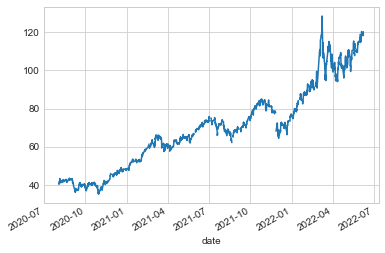

In [96]:
data06.oil.plot()

Zoomining in e identificando missing values em oil. Imputando valores por interpolação linear:

<AxesSubplot:xlabel='date'>

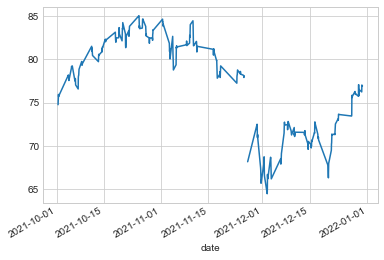

In [97]:
data06.loc["2021-10-01 11:00:00":"2022-01-01 11:00:00", "oil"].plot()

In [98]:
data06.loc[:, "oil"].interpolate(inplace = True)

<ipython-input-98-496436051d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data06.loc[:, "oil"].interpolate(inplace = True)


<AxesSubplot:xlabel='date'>

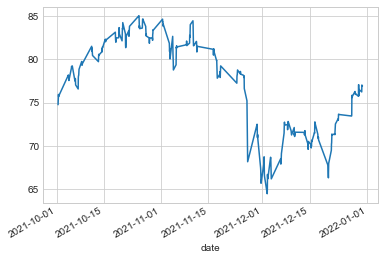

In [99]:
data06.loc["2021-10-01 11:00:00":"2022-01-01 11:00:00", "oil"].plot()

In [100]:
data06.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
oil          0
dollar       2
PETR4        2
PETROBRAS    2
CRISE        2
dtype: int64

In [101]:
data06["PETR4"][data06["PETR4"].isna()]

date
2021-02-17 15:55:00   NaN
2022-03-02 16:55:00   NaN
Name: PETR4, dtype: float64

In [102]:
data06.loc[["2021-02-17 15:55:00","2022-03-02 16:55:00"]]

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
date,,,,,,,,,,,
2021-02-17 15:55:00,28.900000,29.250000,28.870001,29.180000,29.180000,12467800.0,61.035000,NaN,NaN,NaN,NaN
2022-03-02 16:55:00,34.639999,34.779999,34.630001,34.700001,34.700001,13079400.0,108.639999,NaN,NaN,NaN,NaN


In [103]:
data06["dollar"].fillna(method="ffill", inplace = True)
data06["PETR4"].fillna(method="ffill", inplace = True)
data06["PETROBRAS"].fillna(method="ffill", inplace = True)
data06["CRISE"].fillna(method="ffill", inplace = True)

C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [130]:
data06.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
oil          0
dollar       0
PETR4        0
PETROBRAS    0
CRISE        0
date         0
dtype: int64

### Tratamento de Outliers

In [105]:
data06.to_csv("trabalho_final2.csv", date_format = '%Y-%m-%d %H:%M:%S')

<AxesSubplot:>

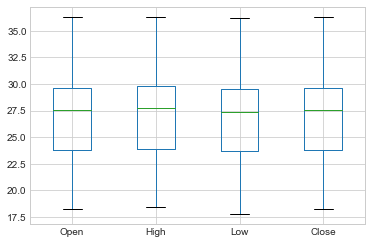

In [131]:
data06[["Open","High", "Low", "Close"]].plot.box()

<AxesSubplot:>

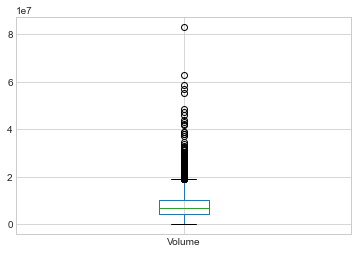

In [132]:
data06["Volume"].plot.box()

<AxesSubplot:>

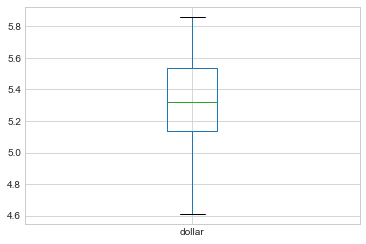

In [133]:
data06["dollar"].plot.box()

<AxesSubplot:>

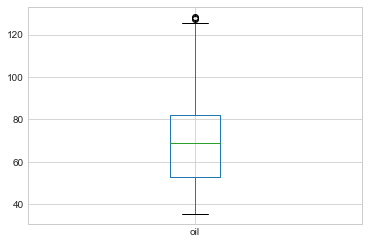

In [134]:
data06["oil"].plot.box()

<AxesSubplot:>

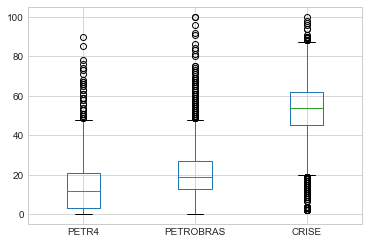

In [135]:
data06[["PETR4","PETROBRAS","CRISE"]].plot.box()

Substituindo ouliers por valores mais comportados de acordo com a função ts_outliers do pacote R forecast. Conforme identificado acima, as variáveis com maior potencial de apresentarem outliers foram Volume, oil, PETR4, PETROBRAS, CRISE.

In [5]:
outlier_vol = pd.read_csv("data/outlier_vol.csv")
outlier_oil = pd.read_csv("data/outlier_oil.csv")
outlier_PETR4 = pd.read_csv("data/outlier_PETR4.csv")
outlier_PETROBRAS = pd.read_csv("data/outlier_PETROBRAS.csv")

In [6]:
outlier_PETROBRAS

,Unnamed: 0,i_PETROBRAS,a_PETROBRAS,r_PETROBRAS
0,1,847,75,61.500000
1,2,853,74,64.666667
2,3,854,81,68.333333
3,4,856,75,46.000000
4,5,919,80,43.500000
5,6,1991,65,33.500000
6,7,2188,96,29.166667
7,8,2189,73,29.333333
8,9,2190,100,29.500000
9,10,2191,69,29.666667


In [138]:
outlier_vol.rename(columns = {'a_vol':'Volume'}, inplace = True)
outlier_oil.rename(columns = {'a_oil':'oil'}, inplace = True)
outlier_PETR4.rename(columns = {'a_PETR4':'PETR4'}, inplace = True)
outlier_PETROBRAS.rename(columns = {'a_PETROBRAS':'PETROBRAS'}, inplace = True)


In [139]:
data06["date"] = data06.index

<ipython-input-139-4371d57a65ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data06["date"] = data06.index


In [140]:
outlier_PETR4.head()

,Unnamed: 0,i_PETR4,PETR4,r_PETR4
0,1,847,90,73.5
1,2,1619,78,30.5
2,3,2886,85,71.5


In [141]:
data07 = pd.merge(data06, outlier_vol[["Volume","r_vol"]], how = "left", on = "Volume")
data08 = pd.merge(data07, outlier_oil[["oil","r_oil"]], how = "left", on = "oil")
data09 = pd.merge(data08, outlier_PETR4[["PETR4","r_PETR4"]], how = "left", on = "PETR4")
data10 = pd.merge(data09, outlier_PETROBRAS[["PETROBRAS","r_PETROBRAS"]], how = "left", on = "PETROBRAS")

In [142]:
data10.index = data10["date"]

In [143]:
data10["r_vol"] = np.where(data10["r_vol"].isna(), data10["Volume"], data10["r_vol"])
data10["r_oil"] = np.where(data10["r_oil"].isna(), data10["oil"], data10["r_oil"])
data10["r_PETR4"] = np.where(data10["r_PETR4"].isna(), data10["PETR4"], data10["r_PETR4"])
data10["r_PETROBRAS"] = np.where(data10["r_PETROBRAS"].isna(), data10["PETROBRAS"], data10["r_PETROBRAS"])

In [144]:
data10.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE,date,r_vol,r_oil,r_PETR4,r_PETROBRAS
date,,,,,,,,,,,,,,,,
2020-08-03 10:00:00,22.540001,22.549999,21.770000,21.850000,21.850000,0.0,40.419998,5.3120,0.0,10.0,64.0,2020-08-03 10:00:00,0.0,40.419998,0.0,10.0
2020-08-03 11:00:00,21.850000,22.090000,21.780001,21.799999,21.799999,10130100.0,40.959999,5.3297,3.0,15.0,42.0,2020-08-03 11:00:00,10130100.0,40.959999,3.0,15.0
2020-08-03 12:00:00,21.790001,22.040001,21.790001,21.950001,21.950001,7127000.0,41.009998,5.3190,4.0,28.0,71.0,2020-08-03 12:00:00,7127000.0,41.009998,4.0,28.0
2020-08-03 13:00:00,21.959999,22.110001,21.910000,22.070000,22.070000,5119400.0,41.099998,5.3179,22.0,24.0,66.0,2020-08-03 13:00:00,5119400.0,41.099998,22.0,24.0
2020-08-03 14:00:00,22.059999,22.090000,21.959999,22.030001,22.030001,7982900.0,41.150002,5.3127,35.0,28.0,62.0,2020-08-03 14:00:00,7982900.0,41.150002,35.0,28.0


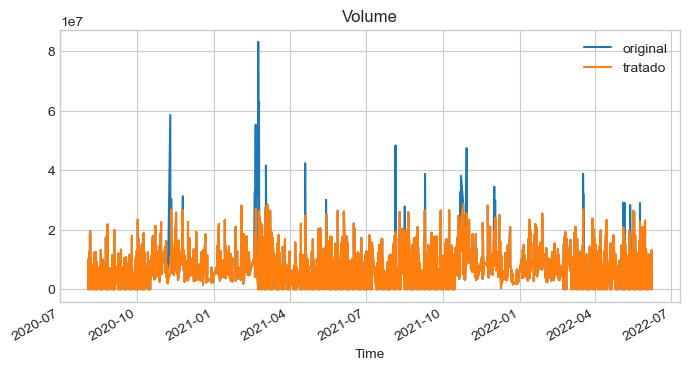

In [145]:
plt.figure(figsize=(8, 4), dpi=100)
data10["Volume"].plot(label ="original")
data10["r_vol"].plot(label ="tratado")
plt.title('Volume')
plt.xlabel('Time')
plt.legend()

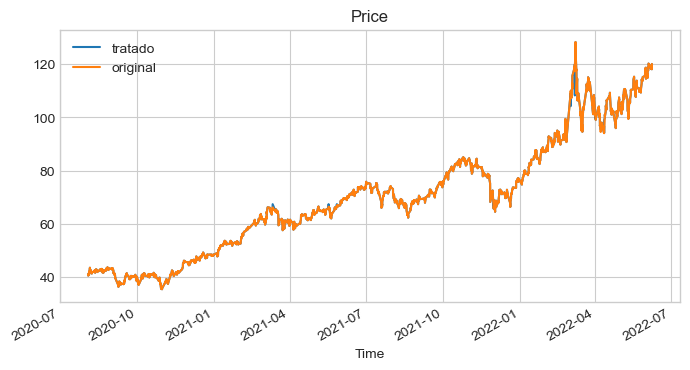

In [146]:
plt.figure(figsize=(8, 4), dpi=100)
data10["r_oil"].plot(label ="tratado")
data10["oil"].plot(label ="original")
plt.title('Price')
plt.xlabel('Time')
plt.legend()

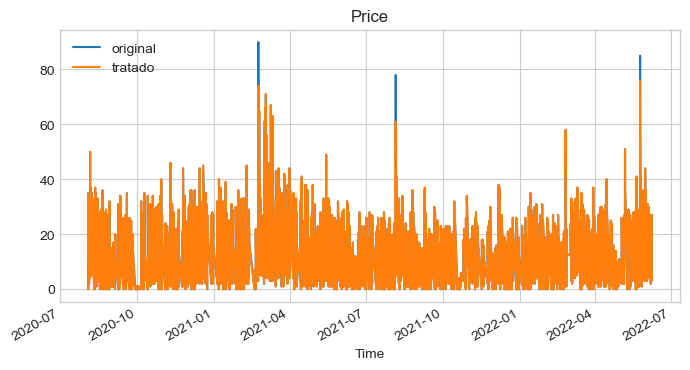

In [147]:
plt.figure(figsize=(8, 4), dpi=100)
data10["PETR4"].plot(label ="original")
data10["r_PETR4"].plot(label ="tratado")
plt.title('Price')
plt.xlabel('Time')
plt.legend()

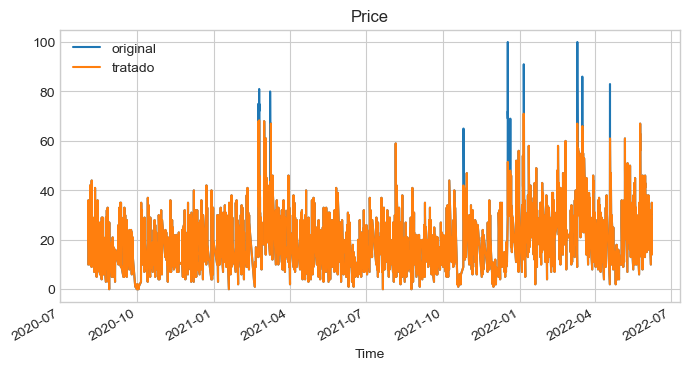

In [148]:
plt.figure(figsize=(8, 4), dpi=100)
data10["PETROBRAS"].plot(label ="original")
data10["r_PETROBRAS"].plot(label ="tratado")
plt.title('Price')
plt.xlabel('Time')
plt.legend()

### Criando o target

Preço em função do tempo não apresenta comportamente estacionário. 

In [149]:
data10["target_value"] = data10["Close"].pct_change()
data10 = data10.loc[data10.index > "2020-05-04 10:00:00"] # elimina primeira instância utilizada para obter a diferença percentual

<AxesSubplot:xlabel='date'>

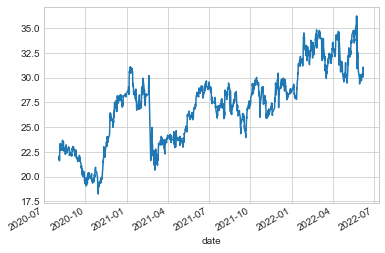

In [150]:
data10["Close"].plot()

<AxesSubplot:xlabel='date'>

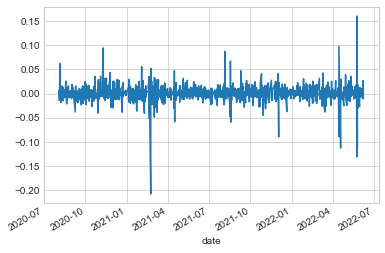

In [151]:
data10["target_value"].plot()

In [152]:
data10["target_value"].describe()

count    2961.000000
mean        0.000183
std         0.011570
min        -0.207478
25%        -0.003630
50%         0.000000
75%         0.003989
max         0.160256
Name: target_value, dtype: float64

In [157]:
data10.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
oil             0
dollar          0
PETR4           0
PETROBRAS       0
CRISE           0
date            0
r_vol           0
r_oil           0
r_PETR4         0
r_PETROBRAS     0
target_value    1
dtype: int64

In [158]:
data10.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE,date,r_vol,r_oil,r_PETR4,r_PETROBRAS,target_value
date,,,,,,,,,,,,,,,,,
2020-08-03 10:00:00,22.540001,22.549999,21.770000,21.850000,21.850000,0.0,40.419998,5.3120,0.0,10.0,64.0,2020-08-03 10:00:00,0.0,40.419998,0.0,10.0,NaN
2020-08-03 11:00:00,21.850000,22.090000,21.780001,21.799999,21.799999,10130100.0,40.959999,5.3297,3.0,15.0,42.0,2020-08-03 11:00:00,10130100.0,40.959999,3.0,15.0,-0.002288
2020-08-03 12:00:00,21.790001,22.040001,21.790001,21.950001,21.950001,7127000.0,41.009998,5.3190,4.0,28.0,71.0,2020-08-03 12:00:00,7127000.0,41.009998,4.0,28.0,0.006881
2020-08-03 13:00:00,21.959999,22.110001,21.910000,22.070000,22.070000,5119400.0,41.099998,5.3179,22.0,24.0,66.0,2020-08-03 13:00:00,5119400.0,41.099998,22.0,24.0,0.005467
2020-08-03 14:00:00,22.059999,22.090000,21.959999,22.030001,22.030001,7982900.0,41.150002,5.3127,35.0,28.0,62.0,2020-08-03 14:00:00,7982900.0,41.150002,35.0,28.0,-0.001812


In [185]:
data11 = data10.loc[data10.index != "2020-08-03 10:00:00"]

In [186]:
data11.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE,date,r_vol,r_oil,r_PETR4,r_PETROBRAS,target_value
date,,,,,,,,,,,,,,,,,
2020-08-03 11:00:00,21.850000,22.090000,21.780001,21.799999,21.799999,10130100.0,40.959999,5.3297,3.0,15.0,42.0,2020-08-03 11:00:00,10130100.0,40.959999,3.0,15.0,-0.002288
2020-08-03 12:00:00,21.790001,22.040001,21.790001,21.950001,21.950001,7127000.0,41.009998,5.3190,4.0,28.0,71.0,2020-08-03 12:00:00,7127000.0,41.009998,4.0,28.0,0.006881
2020-08-03 13:00:00,21.959999,22.110001,21.910000,22.070000,22.070000,5119400.0,41.099998,5.3179,22.0,24.0,66.0,2020-08-03 13:00:00,5119400.0,41.099998,22.0,24.0,0.005467
2020-08-03 14:00:00,22.059999,22.090000,21.959999,22.030001,22.030001,7982900.0,41.150002,5.3127,35.0,28.0,62.0,2020-08-03 14:00:00,7982900.0,41.150002,35.0,28.0,-0.001812
2020-08-03 15:00:00,22.030001,22.059999,21.850000,21.889999,21.889999,7584400.0,40.939999,5.3227,20.0,36.0,61.0,2020-08-03 15:00:00,7584400.0,40.939999,20.0,36.0,-0.006355


In [187]:
ADF_result = adfuller(data11["target_value"])

In [188]:
ADF_result[0]

-16.388440739711598

In [189]:
ADF_result[1]

2.7087690733230835e-29

A variação percentual é uma série temporal estacionária pelo teste de Dickey Fuller.

In [190]:
from statsmodels.graphics.tsaplots import plot_acf

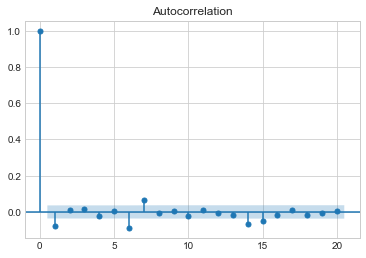

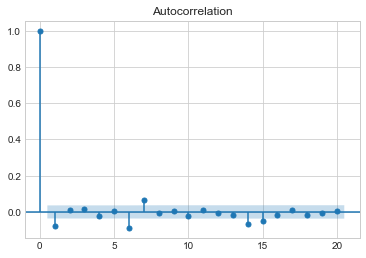

In [191]:
plot_acf(data11["target_value"], lags = 20)

In [192]:
data11["target_class"] = np.where(data11["target_value"]>0, 1, 0)

<ipython-input-192-84afe6512a02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11["target_class"] = np.where(data11["target_value"]>0, 1, 0)


In [193]:
data11.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE,date,r_vol,r_oil,r_PETR4,r_PETROBRAS,target_value,target_class
date,,,,,,,,,,,,,,,,,,
2020-08-03 11:00:00,21.850000,22.090000,21.780001,21.799999,21.799999,10130100.0,40.959999,5.3297,3.0,15.0,42.0,2020-08-03 11:00:00,10130100.0,40.959999,3.0,15.0,-0.002288,0
2020-08-03 12:00:00,21.790001,22.040001,21.790001,21.950001,21.950001,7127000.0,41.009998,5.3190,4.0,28.0,71.0,2020-08-03 12:00:00,7127000.0,41.009998,4.0,28.0,0.006881,1
2020-08-03 13:00:00,21.959999,22.110001,21.910000,22.070000,22.070000,5119400.0,41.099998,5.3179,22.0,24.0,66.0,2020-08-03 13:00:00,5119400.0,41.099998,22.0,24.0,0.005467,1
2020-08-03 14:00:00,22.059999,22.090000,21.959999,22.030001,22.030001,7982900.0,41.150002,5.3127,35.0,28.0,62.0,2020-08-03 14:00:00,7982900.0,41.150002,35.0,28.0,-0.001812,0
2020-08-03 15:00:00,22.030001,22.059999,21.850000,21.889999,21.889999,7584400.0,40.939999,5.3227,20.0,36.0,61.0,2020-08-03 15:00:00,7584400.0,40.939999,20.0,36.0,-0.006355,0


In [194]:
ADF_target = adfuller(data11["target_class"])

In [195]:
ADF_target[0]

-54.87275282538596

In [196]:
ADF_target[1]

0.0

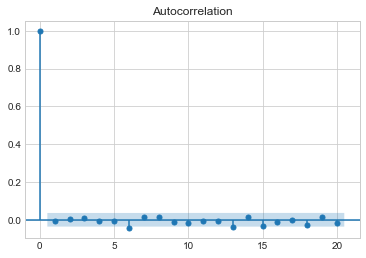

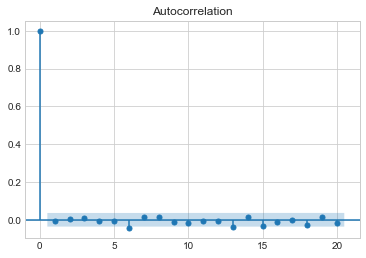

In [197]:
plot_acf(data11["target_class"], lags = 20)

Tanto a variação como o target derivado dela possuem autocorrelação próximas a 0, o que representa um grande desafio para a predição, uma vez que o retorno futuro não apresenta correlção significante com o retorno atual.

In [198]:
data11.target_class.mean()

0.485984464707869

A base é razoavelmente **balanceada**, sendo que em 48,6% das horas/dias, o retorno da PETR4 foi positivo.

In [199]:
data11.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
oil             0
dollar          0
PETR4           0
PETROBRAS       0
CRISE           0
date            0
r_vol           0
r_oil           0
r_PETR4         0
r_PETROBRAS     0
target_value    0
target_class    0
dtype: int64

### Indicadores Técnicos


In [200]:
from talib import RSI, BBANDS, MACD, ATR

data11.loc[:,"ma24"] = data11["Close"].rolling(window = 24).mean()

data11.loc[:,"rsi"] = RSI(data11["Close"], timeperiod=14)

data11.loc[:,"up"], data11.loc[:,"mid"], data11.loc[:,"down"] = BBANDS(data11["Close"], timeperiod=21, nbdevup=2, nbdevdn=2, 
                      matype=0)

data11.loc[:,"atr"] = ATR(data11["High"], data11["Low"], data11["Close"], timeperiod=14)

data11.loc[:,"macd"], data11.loc[:,"macdsignal"], data11.loc[:,"macdhist"] = MACD(data11["Close"], fastperiod=12, slowperiod=26, signalperiod=9)


C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [201]:
data11.head(40)

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,...,target_class,ma24,rsi,up,mid,down,atr,macd,macdsignal,macdhist
date,,,,,,,,,,,,,,,,,,,,,
2020-08-03 11:00:00,21.850000,22.090000,21.780001,21.799999,21.799999,10130100.0,40.959999,5.3297,3.0,15.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03 12:00:00,21.790001,22.040001,21.790001,21.950001,21.950001,7127000.0,41.009998,5.3190,4.0,28.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03 13:00:00,21.959999,22.110001,21.910000,22.070000,22.070000,5119400.0,41.099998,5.3179,22.0,24.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03 14:00:00,22.059999,22.090000,21.959999,22.030001,22.030001,7982900.0,41.150002,5.3127,35.0,28.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03 15:00:00,22.030001,22.059999,21.850000,21.889999,21.889999,7584400.0,40.939999,5.3227,20.0,36.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03 16:00:00,21.870001,21.910000,21.719999,21.760000,21.760000,8684300.0,40.779999,5.3102,19.0,26.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04 10:00:00,21.459999,21.910000,21.250000,21.910000,21.910000,0.0,40.770000,5.3254,2.0,15.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04 11:00:00,21.910000,22.000000,21.700001,21.910000,21.910000,12637200.0,41.250000,5.3184,8.0,14.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04 12:00:00,21.910000,22.049999,21.540001,21.600000,21.600000,8535600.0,41.570000,5.3229,17.0,20.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
data11.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
oil              0
dollar           0
PETR4            0
PETROBRAS        0
CRISE            0
date             0
r_vol            0
r_oil            0
r_PETR4          0
r_PETROBRAS      0
target_value     0
target_class     0
ma24            23
rsi             14
up              20
mid             20
down            20
atr             14
macd            33
macdsignal      33
macdhist        33
dtype: int64

Excluindo 33 primeiros registros utilizados para os cálculos de indicadores:

In [203]:
data11 = data11.loc[data11.index>"2020-08-07 15:00:00"]

In [204]:
data11.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
oil             0
dollar          0
PETR4           0
PETROBRAS       0
CRISE           0
date            0
r_vol           0
r_oil           0
r_PETR4         0
r_PETROBRAS     0
target_value    0
target_class    0
ma24            0
rsi             0
up              0
mid             0
down            0
atr             0
macd            0
macdsignal      0
macdhist        0
dtype: int64

### Visualizando Indicadores

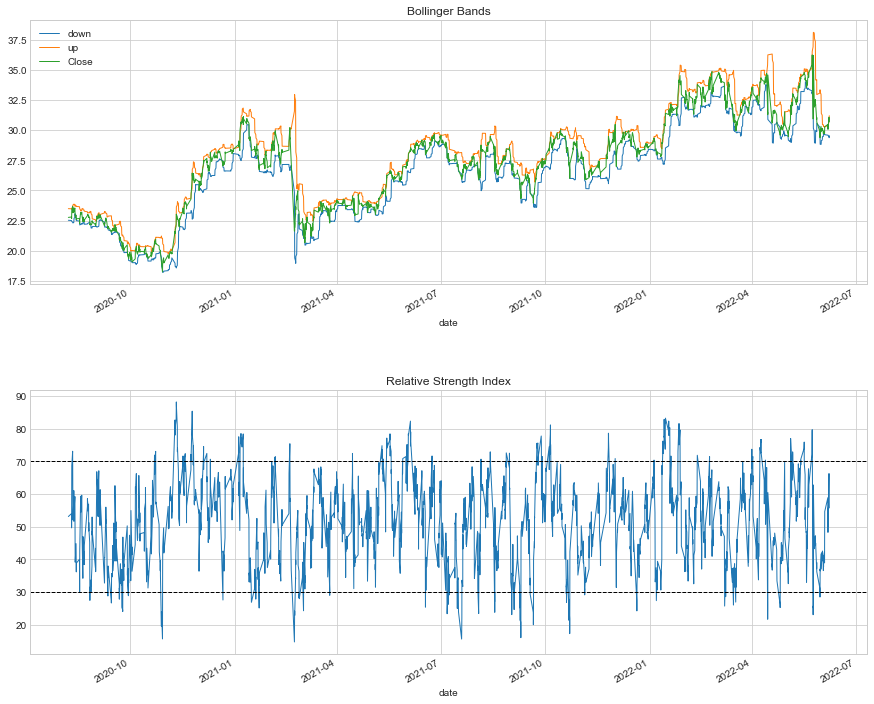

In [205]:
import matplotlib.pyplot as plt

fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
data11[['down','up', "Close"]].plot(ax=axes[0], lw=1, title='Bollinger Bands')
data11['rsi'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
plt.subplots_adjust(top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)

<AxesSubplot:>

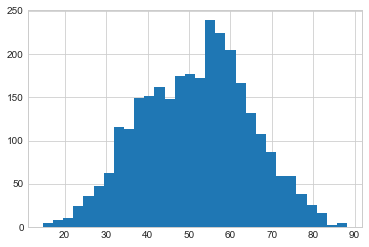

In [206]:
data11["rsi"].hist(bins=30)

### Criando indicadores dummy, com base na teoria de análise técnica de ativos

MACD - difference between two given Exponential Moving Averages. To calculate the MACD line, one EMA with a longer period known as slow length and another EMA with a shorter period known as fast length is calculated. The most popular length of the fast and slow is 12, 26 respectively. Faster signal.

MACDSIGNAL - This line is the Exponential Moving Average (length 9) of the MACD. Slower signal.

HISTOGRAM = MACD - MACDSIGNAL

In [207]:
data11["bbands"] = np.where(data11["Close"]<data11["down"]*1.01, 1, 0)

In [208]:
data11["rsi_dummy"] = np.where(data11["rsi"]<35, 1, 0)

In [209]:
data11["atr_dummy"] = np.where(data11["Close"]>data11["Open"]+0.5*data11["atr"], 1, 0)

In [210]:
data11.tail(50)

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,...,up,mid,down,atr,macd,macdsignal,macdhist,bbands,rsi_dummy,atr_dummy
date,,,,,,,,,,,,,,,,,,,,,
2022-05-27 16:00:00,31.049999,31.080000,30.570000,30.670000,30.670000,20928700.0,115.169998,4.7375,24.0,31.0,...,32.947459,31.762857,30.578255,0.533211,-0.622019,-0.563862,-0.058157,1,0,0
2022-05-30 10:00:00,30.840000,30.870001,29.770000,29.860001,29.860001,0.0,115.616248,4.7107,3.0,13.0,...,33.075105,31.654286,30.233467,0.573696,-0.695659,-0.590221,-0.105437,1,1,0
2022-05-30 11:00:00,29.870001,29.879999,29.120001,29.370001,29.370001,23073500.0,116.062498,4.7355,5.0,25.0,...,33.236876,31.527619,29.818363,0.587003,-0.784514,-0.629080,-0.155434,1,1,0
2022-05-30 12:00:00,29.370001,29.570000,29.299999,29.370001,29.370001,12154300.0,116.508748,4.7424,8.0,32.0,...,33.333927,31.405715,29.477502,0.564360,-0.845189,-0.672302,-0.172888,1,1,0
2022-05-30 13:00:00,29.360001,29.620001,29.299999,29.600000,29.600000,7185100.0,116.954998,4.7316,31.0,44.0,...,33.343298,31.290476,29.237655,0.546906,-0.864748,-0.710791,-0.153957,0,1,0
2022-05-30 14:00:00,29.600000,29.820000,29.540001,29.760000,29.760000,6098400.0,117.401248,4.7423,44.0,46.0,...,33.320044,31.188096,29.056147,0.527841,-0.857453,-0.740123,-0.117330,0,1,0
2022-05-30 15:00:00,29.760000,30.100000,29.760000,30.000000,30.000000,7847500.0,117.847498,4.7477,41.0,41.0,...,33.245886,31.091429,28.936971,0.514424,-0.822821,-0.756663,-0.066158,0,0,0
2022-05-30 16:00:00,29.990000,30.070000,29.709999,29.930000,29.930000,11653500.0,118.293748,4.7527,40.0,43.0,...,33.168072,30.995238,28.822405,0.503394,-0.791895,-0.763709,-0.028186,0,0,0
2022-05-31 10:00:00,30.410000,30.620001,30.120001,30.309999,30.309999,0.0,118.739998,4.7028,6.0,18.0,...,32.965344,30.889048,28.812752,0.516723,-0.728327,-0.756633,0.028306,0,0,0


In [211]:
data11["atr_dummy"].mean()

0.1567622950819672

### Ajuste no Target

Ajuste de target para que features passadas prevejam target futuro:

In [212]:
data11["target_value"] = data11["target_value"].shift(periods=-1)
data11["target_class"] = data11["target_class"].shift(periods=-1)

In [213]:
data11[["target_value", "target_class"]].tail(50)

,target_value,target_class
date,,
2022-05-27 16:00:00,-0.026410,0.0
2022-05-30 10:00:00,-0.016410,0.0
2022-05-30 11:00:00,0.000000,0.0
2022-05-30 12:00:00,0.007831,1.0
2022-05-30 13:00:00,0.005405,1.0
2022-05-30 14:00:00,0.008065,1.0
2022-05-30 15:00:00,-0.002333,0.0
2022-05-30 16:00:00,0.012696,1.0
2022-05-31 10:00:00,-0.003629,0.0


In [214]:
pd.options.display.float_format = "{:,.4f}".format
data11.corr().loc["target_class"]

Open            0.0101
High            0.0083
Low             0.0090
Close           0.0075
Adj Close       0.0075
Volume         -0.0023
oil             0.0143
dollar          0.0022
PETR4          -0.0010
PETROBRAS       0.0148
CRISE           0.0014
r_vol           0.0027
r_oil           0.0145
r_PETR4         0.0009
r_PETROBRAS     0.0182
target_value    0.5438
target_class    1.0000
ma24            0.0117
rsi            -0.0172
up              0.0118
mid             0.0116
down            0.0111
atr             0.0032
macd           -0.0150
macdsignal     -0.0103
macdhist       -0.0163
bbands          0.0037
rsi_dummy       0.0260
atr_dummy      -0.0191
Name: target_class, dtype: float64

Os valores up, down e mid das bandas de Bollinger já foram incluídos na dummy bbands. O termo PETR4 e preço do petróleo serão mantidos, embora apresentem pouca correlação, pois eles podem estar relacionados com o target de forma não linear. Em relação ao termo PETROBRAS e volume será mantida apenas a versão após tratamento de outliers.  

In [215]:
data12 = data11[["Open", "High", "Low", "Close","dollar", "CRISE","r_vol", "r_oil","r_PETR4","r_PETROBRAS", "ma24", "macd","macdsignal", "macdhist", "bbands", "rsi_dummy", "atr_dummy", "target_value", "target_class"]]

In [216]:
data12.head()

,Open,High,Low,Close,dollar,CRISE,r_vol,r_oil,r_PETR4,r_PETROBRAS,ma24,macd,macdsignal,macdhist,bbands,rsi_dummy,atr_dummy,target_value,target_class
date,,,,,,,,,,,,,,,,,,,
2020-08-07 16:00:00,22.6700,22.7600,22.6400,22.7600,5.4113,44.0000,"4,924,000.0000",41.5300,35.0000,31.0000,22.8525,0.2282,0.4154,-0.1872,0,0,0,0.0013,1.0000
2020-08-10 10:00:00,22.9000,23.0300,22.7700,22.7900,5.3748,51.0000,0.0000,42.0900,0.0000,8.0000,22.8946,0.2074,0.3738,-0.1664,0,0,0,-0.0009,0.0000
2020-08-10 11:00:00,22.7900,22.8700,22.7200,22.7700,5.4010,62.0000,"4,043,200.0000",41.8800,2.0000,20.0000,22.9329,0.1871,0.3364,-0.1493,0,0,0,-0.0044,0.0000
2020-08-10 12:00:00,22.7700,22.8100,22.6400,22.6700,5.4239,90.0000,"3,890,900.0000",42.1000,4.0000,7.0000,22.9700,0.1611,0.3014,-0.1402,1,0,0,0.0040,1.0000
2020-08-10 13:00:00,22.6700,22.7700,22.6600,22.7600,5.4180,58.0000,"1,918,000.0000",42.2500,33.0000,27.0000,22.9546,0.1461,0.2703,-0.1242,0,0,0,0.0158,1.0000


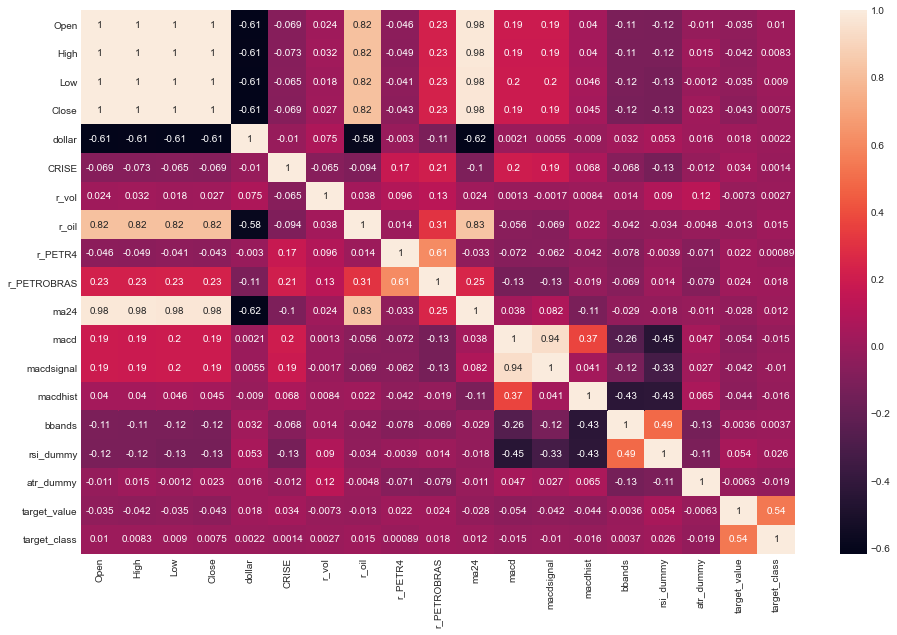

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,10))
sns.heatmap(data12.corr(), annot = True)
plt.show()

Como os valores de Open, Close, Mínimo e Máximo apresentam alta correlação entre si e como já foram incluídos indiretamente nos indicadores técnicos, optou-se por retirá-los da base de treinamento.

In [218]:
data13 = data12[["dollar", "CRISE","r_vol", "r_oil","r_PETR4","r_PETROBRAS", "ma24", "macd","macdsignal", "macdhist", "bbands", "rsi_dummy", "atr_dummy", "target_value", "target_class"]]

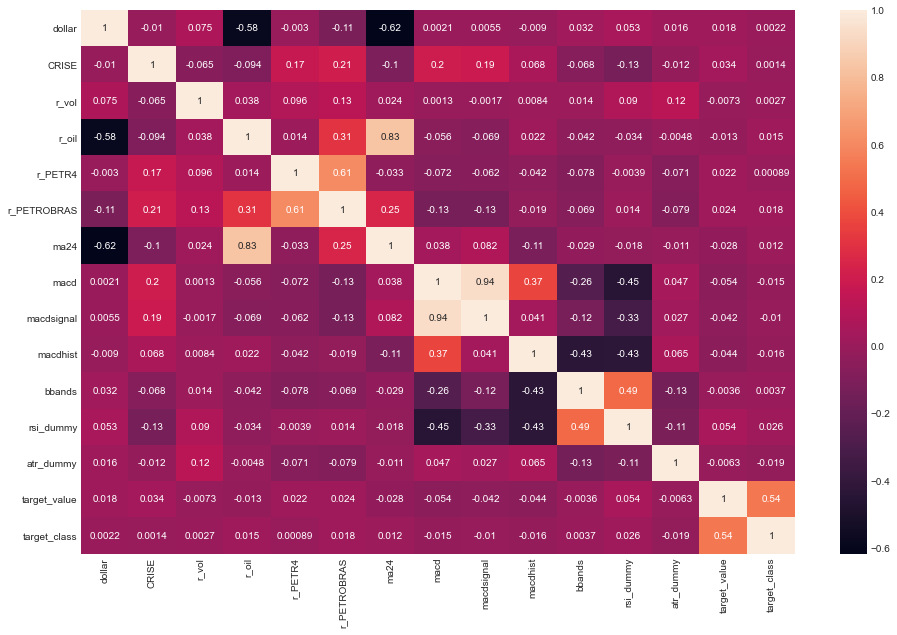

In [219]:
plt.figure(figsize = (16,10))
sns.heatmap(data13.corr(), annot = True)
plt.show()

In [220]:
data13.tail()

,dollar,CRISE,r_vol,r_oil,r_PETR4,r_PETROBRAS,ma24,macd,macdsignal,macdhist,bbands,rsi_dummy,atr_dummy,target_value,target_class
date,,,,,,,,,,,,,,,
2022-06-07 12:00:00,4.8874,63.0000,"7,320,000.0000",119.4700,6.0000,27.0000,30.1258,0.1581,0.0315,0.1266,0,0,0,0.0010,1.0000
2022-06-07 13:00:00,4.8649,63.0000,"6,206,100.0000",119.2900,22.0000,32.0000,30.1687,0.1843,0.0621,0.1222,0,0,0,-0.0058,0.0000
2022-06-07 14:00:00,4.8640,63.0000,"7,855,400.0000",118.1200,27.0000,35.0000,30.2129,0.1884,0.0873,0.1010,0,0,0,0.0023,1.0000
2022-06-07 15:00:00,4.8652,60.0000,"7,019,300.0000",120.1000,25.0000,32.0000,30.2525,0.1950,0.1089,0.0861,0,0,0,-0.0049,0.0000
2022-06-07 16:00:00,4.8716,66.0000,"11,188,300.0000",120.1200,23.0000,31.0000,30.2883,0.1860,0.1243,0.0617,0,0,0,NaN,NaN


In [221]:
data14 = data13.loc[data13.index<"2022-06-07 16:00:00"]

In [222]:
data14.tail()

,dollar,CRISE,r_vol,r_oil,r_PETR4,r_PETROBRAS,ma24,macd,macdsignal,macdhist,bbands,rsi_dummy,atr_dummy,target_value,target_class
date,,,,,,,,,,,,,,,
2022-06-07 11:00:00,4.9015,63.0000,"13,122,100.0000",119.3500,4.0000,22.0000,30.0908,0.1255,-0.0001,0.1256,0,0,0,-0.0023,0.0000
2022-06-07 12:00:00,4.8874,63.0000,"7,320,000.0000",119.4700,6.0000,27.0000,30.1258,0.1581,0.0315,0.1266,0,0,0,0.0010,1.0000
2022-06-07 13:00:00,4.8649,63.0000,"6,206,100.0000",119.2900,22.0000,32.0000,30.1687,0.1843,0.0621,0.1222,0,0,0,-0.0058,0.0000
2022-06-07 14:00:00,4.8640,63.0000,"7,855,400.0000",118.1200,27.0000,35.0000,30.2129,0.1884,0.0873,0.1010,0,0,0,0.0023,1.0000
2022-06-07 15:00:00,4.8652,60.0000,"7,019,300.0000",120.1000,25.0000,32.0000,30.2525,0.1950,0.1089,0.0861,0,0,0,-0.0049,0.0000


In [223]:
data14.isna().sum()

dollar          0
CRISE           0
r_vol           0
r_oil           0
r_PETR4         0
r_PETROBRAS     0
ma24            0
macd            0
macdsignal      0
macdhist        0
bbands          0
rsi_dummy       0
atr_dummy       0
target_value    0
target_class    0
dtype: int64

In [224]:
data14.to_csv("trabalho_final3.csv", date_format = '%Y-%m-%d %H:%M:%S')